In [ ]:
using MAT;
using CuArrays;
using Plots;

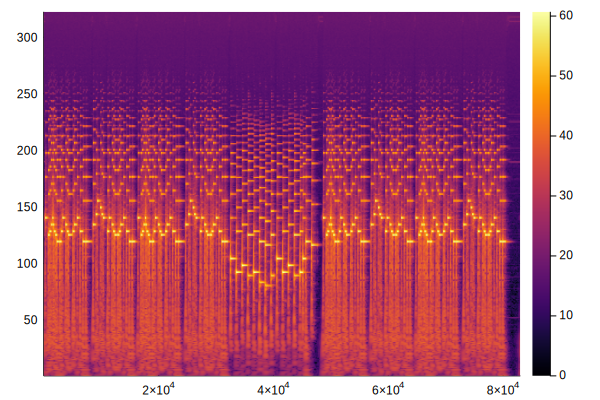

In [2]:
vars = matread("tetrisA_mono_cqt.mat");
cfs = vars["cfs"];
S = cfs["c"];
i_mid = Int(size(S,1)/2);
S = S[1:i_mid,:];
S = 10*log10.(abs.(S));
S = S .- min(S...);
heatmap(S)

In [3]:
num_components = 50;
num_iter = 5;
num_frames = 40000;

In [4]:
V = S[:,1:num_frames];
W = rand(size(V,1),num_components);
H = rand(num_components,size(V,2));
for i_iter = 1:num_iter
    print("i_iter = ",i_iter)
    print(", cost = ",sqrt(sum((W*H - V).^2)),"\n")
    H = @time H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = @time W .* (V*H') ./ (W*H*H' .+ 1e-9)
end

i_iter = 1, cost = 58203.3001843351
  0.278782 seconds (528.84 k allocations: 71.837 MiB, 8.50% gc time)
  0.136067 seconds (20.68 k allocations: 99.688 MiB, 3.18% gc time)
i_iter = 2, cost = 16613.665696556553
  0.053296 seconds (16 allocations: 45.796 MiB, 21.98% gc time)
  0.123340 seconds (16 allocations: 98.636 MiB, 1.97% gc time)
i_iter = 3, cost = 16563.221744573326
  0.057123 seconds (16 allocations: 45.796 MiB, 20.33% gc time)
  0.121936 seconds (16 allocations: 98.636 MiB, 1.31% gc time)
i_iter = 4, cost = 16533.172464490537
  0.050415 seconds (16 allocations: 45.796 MiB, 23.59% gc time)
  0.124413 seconds (16 allocations: 98.636 MiB, 1.27% gc time)
i_iter = 5, cost = 16503.661254492494
  0.048223 seconds (16 allocations: 45.796 MiB, 17.63% gc time)
  0.118557 seconds (16 allocations: 98.636 MiB, 1.23% gc time)


In [5]:
V = cu(S[:,1:num_frames]);
W = cu(rand(size(V,1),num_components));
H = cu(rand(num_components,size(V,2)));

In [6]:
for i_iter = 1:num_iter
    print("i_iter = ",i_iter)
    print(", cost = ",sqrt(sum((W*H - V).^2)),"\n")
    H = @time H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = @time W .* (V*H') ./ (W*H*H' .+ 1e-9)
end

i_iter = 1, cost = 57965.438
  0.922649 seconds (2.54 M allocations: 130.701 MiB, 7.73% gc time)
  1.740681 seconds (4.37 M allocations: 224.797 MiB, 6.42% gc time)
i_iter = 2, cost = 16613.411810428617
  0.868570 seconds (1.86 M allocations: 97.191 MiB, 5.05% gc time)
  0.006247 seconds (4.01 k allocations: 205.074 KiB)
i_iter = 3, cost = 16566.462726618563
  0.000459 seconds (311 allocations: 15.281 KiB)
  0.000536 seconds (322 allocations: 15.484 KiB)
i_iter = 4, cost = 16537.89928132053
  0.000608 seconds (322 allocations: 15.484 KiB)
  0.000481 seconds (331 allocations: 21.781 KiB)
i_iter = 5, cost = 16509.854969431446
  0.000613 seconds (325 allocations: 16.328 KiB)
  0.000566 seconds (322 allocations: 15.484 KiB)


In [7]:
for i_iter = 1:1000
    H = H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = W .* (V*H') ./ (W*H*H' .+ 1e-9)
end
print("cost = ",sqrt(sum((W*H - V).^2)),"\n")

cost = 3107.547979610544


In [8]:
;nvidia-smi

Sun Apr  7 15:30:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 970     On   | 00000000:09:00.0 Off |                  N/A |
| 41%   59C    P2    55W / 163W |   3944MiB /  4041MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [9]:
V2 = collect(V);
W2 = collect(W);
H2 = collect(H);

In [11]:
matwrite("tetrisA_mono_WH.mat", Dict("W" => W2,"H" => H2))

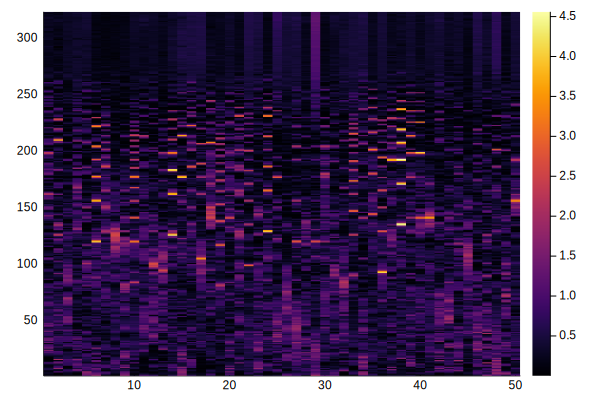

In [12]:
heatmap(W2)

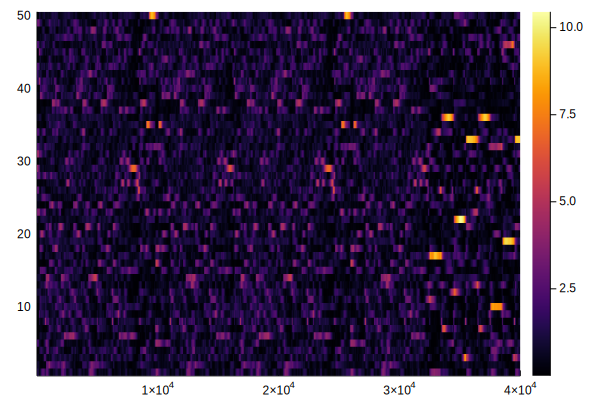

In [13]:
heatmap(H2)

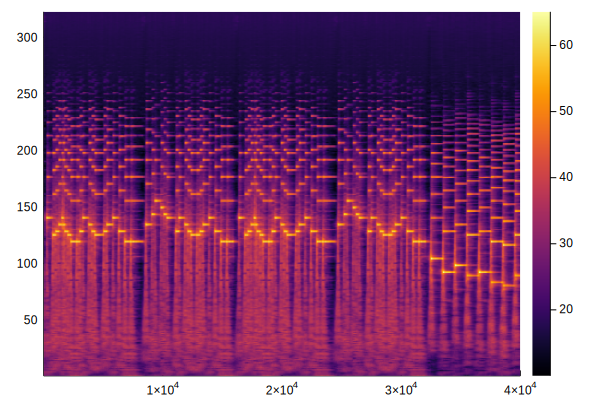

In [14]:
heatmap(W2*H2)

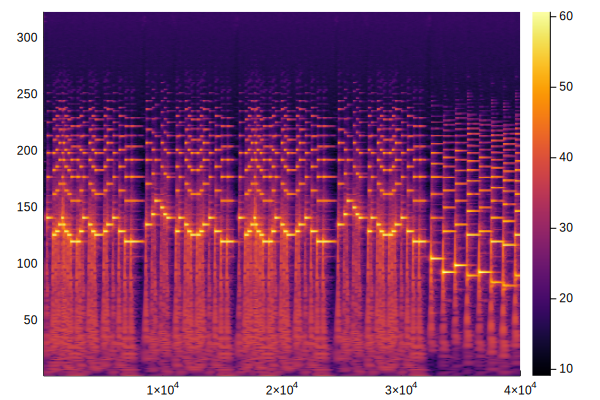

In [15]:
heatmap(V2)